# Deep Neural Network: Anti-Microbial Peptide Prediction

## TensorFlow Model

In [1]:
# Import Dependencies.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns

# Set Font for Matplotlib
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica Neue Light', 'Helvetica Neue', 'Arial']

# Set DPI of all Plots
plt.rcParams["figure.dpi"] = 150

# Set Dark Grid for all Plots
sns.set_style('darkgrid')

# Import Data
peptides_df = pd.read_csv("Resources/peptides.csv")

In [2]:
# One-Hot Encode Amino Acid Sequences

# FUNCTION: One-Hot Encode Amino Acid Sequence
def one_hot_encode(sequence):
    # Amino Acids
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    # Map unique Amino Acids to Column indices
    amino_acid_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    one_hot_matrix = np.zeros((len(sequence), len(amino_acids)), dtype=int)
    for i, aa in enumerate(sequence):
        if aa in amino_acid_to_index:
            one_hot_matrix[i, amino_acid_to_index[aa]] = 1
    return one_hot_matrix

In [3]:
# Padding of One-Hot-Encoded Sequence

# FUNCTION: Pads One-Hot-Encoded Array Sequences
def pad_arrays(arr_list, desired_len):
    while len(arr_list) < desired_len:
        arr_list = np.vstack((arr_list, np.zeros(arr_list[0].shape, dtype=np.int64)))
    return arr_list

### Preprocess Data

In [4]:
# One-Hot Encode Sequence Column
peptides_df['One_Hot_Encoded'] = peptides_df['Sequence'].apply(one_hot_encode)

In [5]:
# Find Max Amino Acid Sequence Length
max_length = peptides_df['Sequence_Length'].max()

# Apply the padding function to the 'One_Hot_Encoded' column
peptides_df['Padded_One_Hot'] = peptides_df['One_Hot_Encoded'].apply(lambda arr_list: pad_arrays(arr_list, max_length))

In [6]:
# Check peptides_df
peptides_df

,Sequence_ID,Sequence,Anti_Microbial,Sequence_Length,KD_Scores,Total_KD_Score,One_Hot_Encoded,Padded_One_Hot
0,AMP_1106,GLWEKIKEKASELVSGIVEGVK,1,22,"[-0.4, 3.8, -0.9, -3.5, -3.9, 4.5, -3.9, -3.5,...",-2.3,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,non_amp_3904,EMWCLFYQQFKHFACAKDNGHVGPTCGN,0,28,"[-3.5, 1.9, -0.9, 2.5, 3.8, 2.8, -1.3, -3.5, -...",-11.5,"[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,non_amp_5477,TIECKRCEALSHDWPAWRCGTYG,0,23,"[-0.7, 4.5, -3.5, 2.5, -3.9, -4.5, 2.5, -3.5, ...",-14.9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,AMP_1215,GKNPILQCMGNRGFCRSSCKKSEQAYFYCRTFQMCCLQSYVRISLT...,1,64,"[-0.4, -3.9, -3.5, -1.6, 4.5, 3.8, -3.5, 2.5, ...",-41.3,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,AMP_4350,MFTMKKSLLLLFFLGAISLSLCEQERDADEEDGGEVTEEEVKRAAF...,1,63,"[1.9, 2.8, -0.7, 1.9, -3.9, -3.9, -0.8, 3.8, 3...",-26.6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...
22432,non_amp_511,MKVQASVKPRCEYCRVIKRKGVLRVICSRQPKHKQRQG,0,38,"[1.9, -3.9, 4.2, -3.5, 1.8, -0.8, 4.2, -3.9, -...",-33.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
22433,non_amp_5315,CEIPCAYCKHPHDYNVGYSSKTGMENETVYWSTGFSSVRCGE,0,42,"[2.5, -3.5, 4.5, -1.6, 2.5, 1.8, -1.3, 2.5, -3...",-26.6,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
22434,AMP_3811,KFKKFKKFKKFKKFKKFKKFKKFKKFKKFK,1,30,"[-3.9, 2.8, -3.9, -3.9, 2.8, -3.9, -3.9, 2.8, ...",-50.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
22435,amp5_30_1058,FLPVIAGVAANFLPKLFCAISKKC,1,24,"[2.8, 3.8, -1.6, 4.2, 4.5, 1.8, -0.4, 4.2, 1.8...",29.8,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [7]:
# Split Data into Feature(X) and Target(y) Arrays
X = peptides_df['Padded_One_Hot'].values
y = peptides_df['Anti_Microbial'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Check Length of Arrays
len(peptides_df['Padded_One_Hot'][100])

198

In [9]:
# Check Single Amino Acid Entry
peptides_df['Padded_One_Hot']

0        [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1        [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3        [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...
                               ...                        
22432    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...
22433    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
22434    [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...
22435    [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
22436    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: Padded_One_Hot, Length: 22437, dtype: object

In [10]:
# Convert Input Data to Numpy Array
X_train = np.array([np.array(val) for val in X_train])
y_train = np.array([np.array(val) for val in y_train])
X_test = np.array([np.array(val) for val in X_test])
y_test = np.array([np.array(val) for val in y_test])

### Build, Train and Evaluate Model

In [11]:
# Build Convolutional Neural Network
model = tf.keras.models.Sequential()

# Add 2D Convolutional Layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(198, 20, 1)))

# Add Max-Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten Feature Map
model.add(tf.keras.layers.Flatten())

# Add Dense Layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Hyperparameter Tuning (drops Neurons during Training to reduce Overfitting)
model.add(tf.keras.layers.Dropout(0.5))

# Add Dense Layer
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add Output Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 18, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 9, 32)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 128)               3612800   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

In [12]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train Model
model_fit = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
526/526 [==============================] - 6s 10ms/step - loss: 0.3997 - accuracy: 0.8230 - val_loss: 0.2807 - val_accuracy: 0.8861
Epoch 2/5
526/526 [==============================] - 6s 11ms/step - loss: 0.2706 - accuracy: 0.8927 - val_loss: 0.2419 - val_accuracy: 0.9075
Epoch 3/5
526/526 [==============================] - 6s 12ms/step - loss: 0.2141 - accuracy: 0.9182 - val_loss: 0.2098 - val_accuracy: 0.9212
Epoch 4/5
526/526 [==============================] - 6s 12ms/step - loss: 0.1731 - accuracy: 0.9361 - val_loss: 0.1988 - val_accuracy: 0.9264
Epoch 5/5
526/526 [==============================] - 7s 12ms/step - loss: 0.1338 - accuracy: 0.9504 - val_loss: 0.1850 - val_accuracy: 0.9369


In [14]:
# Evaluate Model using Test Data
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

176/176 - 1s - loss: 0.1850 - accuracy: 0.9369 - 767ms/epoch - 4ms/step
Loss: 0.18503297865390778, Accuracy: 0.936898410320282


### Visualise Model

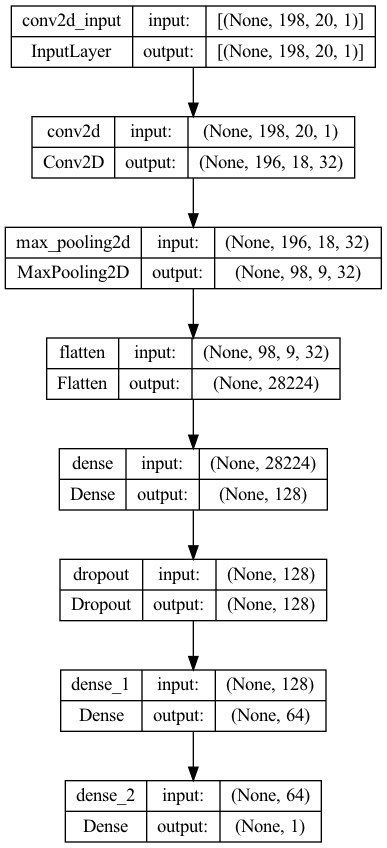

In [15]:
# Generate LeNet Diagram
tf.keras.utils.plot_model(model, to_file='AMP_CNN.png', show_shapes=True, show_layer_names=True)

In [16]:
# Create DataFrame containing training history for Visualisation
model_history_df = pd.DataFrame(model_fit.history)

# Set index name to 'epoch'
model_history_df.index.set_names('epoch', inplace=True)

# Increase Index by 1 to Properly Represent Epochs
model_history_df.index = model_history_df.index + 1

# Show DataFrame
model_history_df

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.399697,0.822963,0.280703,0.886096
2,0.270573,0.892672,0.241896,0.907487
3,0.214071,0.918167,0.209810,0.921212
4,0.173124,0.936055,0.198830,0.926381
5,0.133773,0.950377,0.185033,0.936898


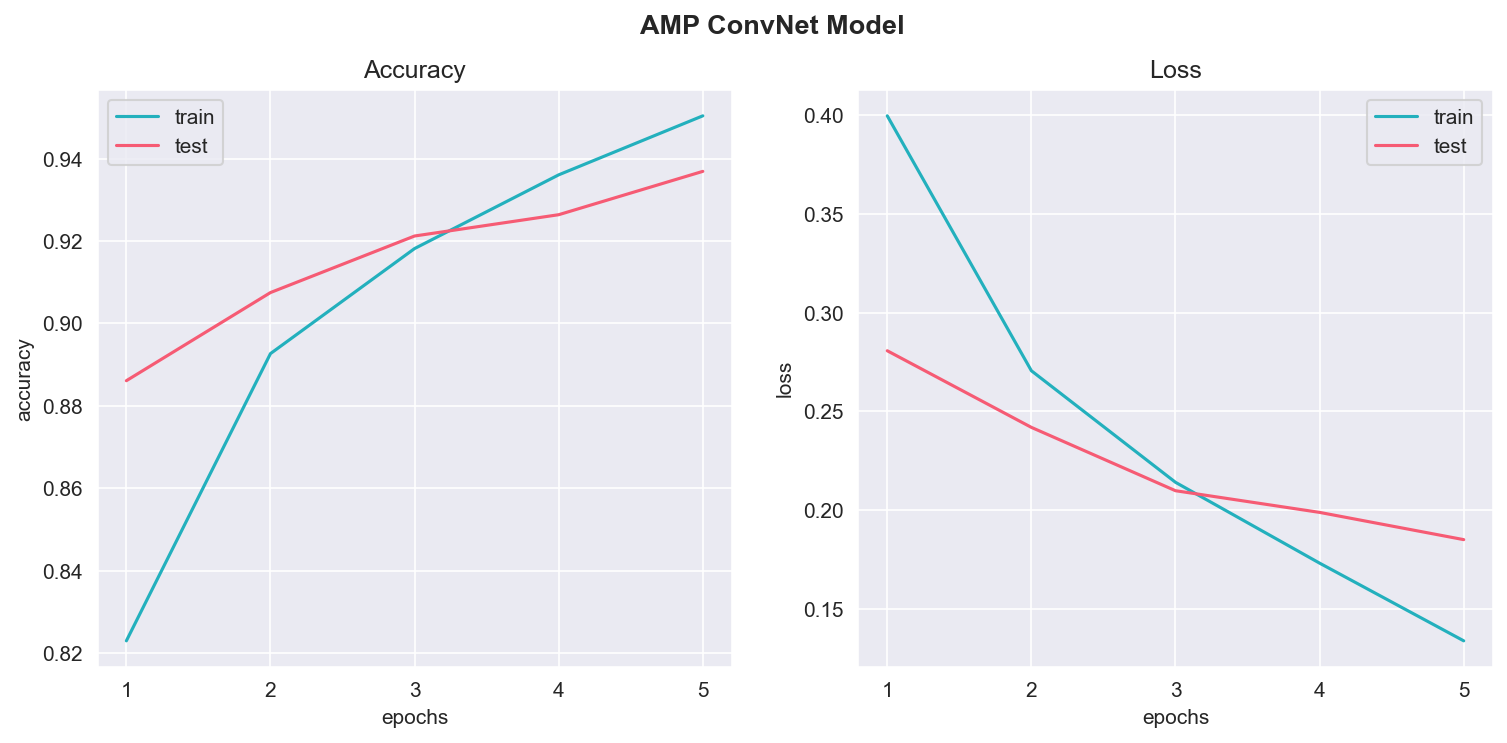

In [17]:
# Composite plot of Model Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Define Accuracy subplot (left plot)
ax[0].plot(model_history_df.index.astype(int), model_history_df['accuracy'], '#23b0bd', label='train')
ax[0].plot(model_history_df.index.astype(int), model_history_df['val_accuracy'], '#f65b74', label='test')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].set_title("Accuracy")

ax[0].legend()

# Define Loss subplot (right plot)
ax[1].plot(model_history_df.index, model_history_df['loss'], '#23b0bd', label='train')
ax[1].plot(model_history_df.index, model_history_df['val_loss'], '#f65b74', label='test')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].set_title("Loss")
ax[1].legend()

# Set xticks to show all Epochs
ax[0].set_xticks(np.arange(1, 6, 1))
ax[1].set_xticks(np.arange(1, 6, 1))

# Set main title (super title)
plt.suptitle("AMP ConvNet Model", fontsize=13, fontweight='bold')

# Show figure
plt.show()

### Save and Export Model

In [18]:
# Export Model to HDF5 file
model.save("HDF5_files/convolutional_nn_1.h5")

/Users/samuelpalframan/anaconda3/envs/BootCamp/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
